### pythonで経済センサスのメッシュデータを読み込む

In [58]:
import pandas as pd
import geopandas as gpd
from settings import geodatadir
import contextily as cx

In [59]:
mesh = gpd.read_file(geodatadir + 'mesh500/HDDSWH5339/MESH05339.shp', crs=4612)
# 500mメッシュ座標データ（地理データ）
mesh = mesh[['KEY_CODE', 'geometry']]
mesh.KEY_CODE = mesh.KEY_CODE.astype(str)

keizai = pd.read_csv(geodatadir + "keizai500/tblT000389H5339.txt", encoding='sjis', skiprows=1)
# メッシュデータに結合する経済センサスの就業者数データ
keizai.columns = ['KEY_CODE', 'company', 'people']
keizai.KEY_CODE = keizai.KEY_CODE.astype(str)

In [60]:
df = pd.merge(mesh, keizai, on='KEY_CODE')
# メッシュデータに経済センサスのデータを結合する
df.sort_values('people', ascending=False)
# メッシュデータを経済センサスの就業者数が多い順に表示する

,KEY_CODE,geometry,company,people
8848,533946211,"POLYGON ((139.76875 35.68333, 139.76250 35.683...",750,75698
8507,533945352,"POLYGON ((139.70000 35.69167, 139.69375 35.691...",1735,64747
8470,533945254,"POLYGON ((139.70000 35.68750, 139.69375 35.687...",1666,61058
8850,533946213,"POLYGON ((139.76875 35.68750, 139.76250 35.687...",1574,55565
8767,533946002,"POLYGON ((139.76250 35.66667, 139.75625 35.666...",4015,52265
...,...,...,...,...
14322,533971072,"POLYGON ((139.22500 35.91667, 139.21875 35.916...",1,0
1581,533905832,"POLYGON ((139.67500 35.40000, 139.66875 35.400...",1,0
3335,533921512,"POLYGON ((139.15000 35.54167, 139.14375 35.541...",1,0
3330,533921474,"POLYGON ((139.22500 35.53750, 139.21875 35.537...",2,0


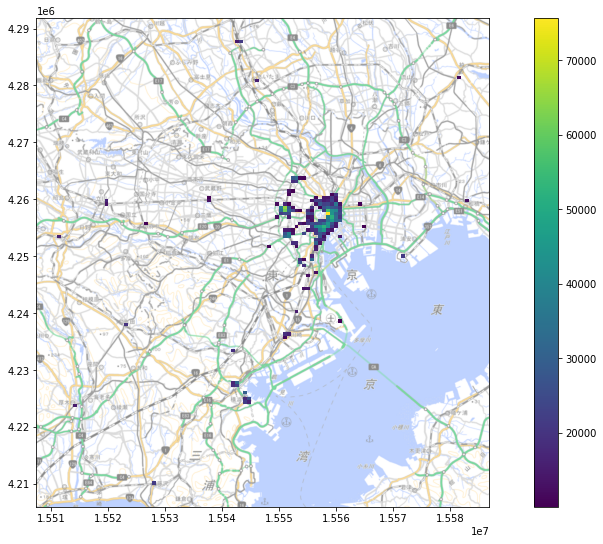

In [61]:
ax = df[df.people > 10000].to_crs(3857).plot('people', figsize=(16, 9), legend=True)
cx.add_basemap(ax, source='https://cyberjapandata.gsi.go.jp/xyz/pale/{z}/{x}/{y}.png')

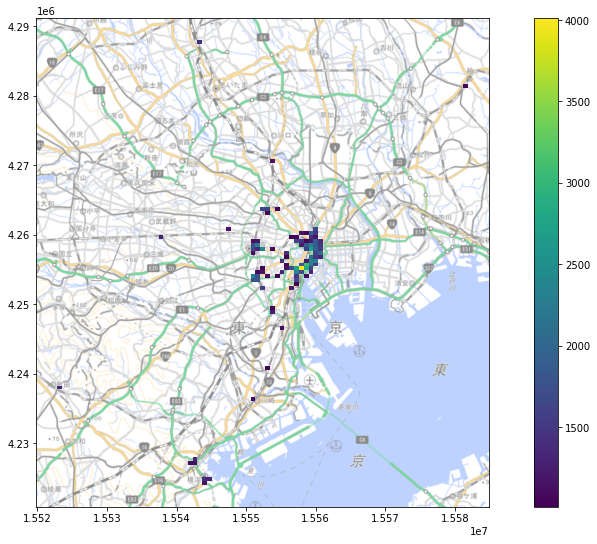

In [62]:
ax = df[df.company > 1000].to_crs(3857).plot('company', figsize=(16, 9), legend=True)
cx.add_basemap(ax, source='https://cyberjapandata.gsi.go.jp/xyz/pale/{z}/{x}/{y}.png')